In [1]:
import pandas as pd
%matplotlib inline


Bad key savefig.frameon in file C:\Users\jeffr\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\jeffr\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\jeffr\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

In [2]:
from pathlib import Path
csvpath = Path('../Resources/yield.csv')
data = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [3]:
data.head()

,Yield
Date,
1971-08-16,0.5632
1971-08-17,0.7108
1971-08-18,1.0657
1971-08-19,1.1335
1971-08-20,1.0313


<AxesSubplot:xlabel='Date'>

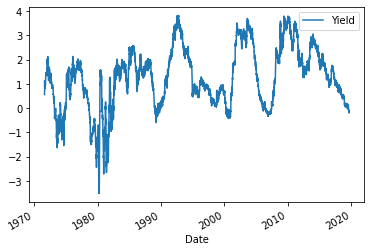

In [4]:
data.plot()

In [10]:
# Test to see if the data is stationary or non-stationary.
# Convert to stationary if needed.
# YOUR CODE HERE!
from statsmodels.tsa.stattools import adfuller
result = adfuller(data.Yield)
print('ADF Statistic: %f' % result[0])
print('p-value:        %f' % result[1])
print('Lags used:      %f' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print((key, value))

ADF Statistic: -3.393721
p-value:        0.011175
Lags used:      31.000000
Critical Values:
('1%', -3.430897660224935)
('5%', -2.861782037578331)
('10%', -2.566898831549907)


In [5]:
# Test to see if the data is stationary or non-stationary.
# Convert to stationary if needed.
# YOUR CODE HERE!

(-3.393721350649337,
 0.011174781599654855,
 31,
 11943,
 {'1%': -3.430897660224935,
  '5%': -2.861782037578331,
  '10%': -2.566898831549907},
 -34557.309891380675)

# Autocorrelation and Partial Autocorrelation Analysis

Use the autocorrelation and partial autocorrelation data to get a sense of how many lags to use in the ARMA model.

In [12]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

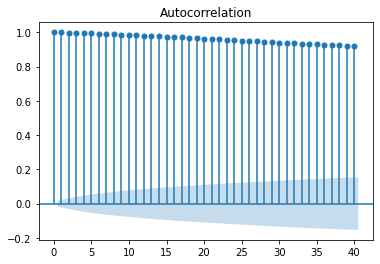

In [16]:
plot_acf(data.Yield, lags=40);

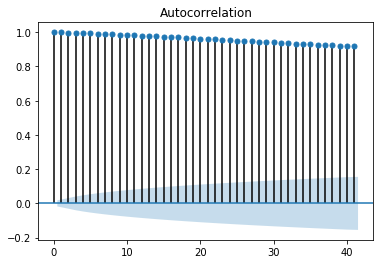

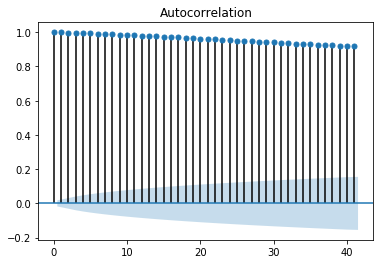

In [6]:
# Plot the autocorrelation of the yield data
# YOUR CODE HERE!

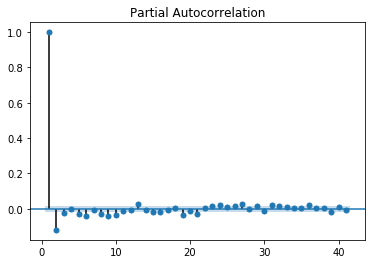

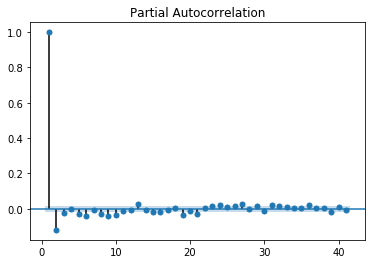

In [7]:
# Plot the partial autocorrelation of the yield data
# YOUR CODE HERE!

How many lags should be used in the ARMA model?

The autocorrelation plot shows that all lags could potentially be useful. 

However, the partial autocorrelation plot shows most of the trend is in the first two lags.

# ARMA Model

Create an ARMA model and fit it to the data. Output the summary table and take note of the p-values of the lags.

Plot the Forecast for the next 5 days of yield changes

In [18]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(data.Yield, order=(2, 2))
# from statsmodels.tsa.arima.model import ARIMA
# model = ARIMA(data.Yield, order=(2, 0, 2))
result = model.fit()
result.summary()
# YOUR CODE HERE!

C:\Users\jeffr\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\jeffr\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Yield   No. Observations:                11975
Model:                     ARMA(2, 2)   Log Likelihood               17294.672
Method:                       css-mle   S.D. of innovations              0.057
Date:                Tue, 30 Nov 2021   AIC                         -34577.344
Time:                        19:57:13   BIC                         -34533.001
Sample:                             0   HQIC                        -34562.468
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1813      0.318      3.712      0.000       0.558       1.805
ar.L1.Yield     1.9150      0.004    480.405      0.000       1.907       1.923
ar.L2.Yield    -0.9152      0.004   -229.970      0.000      -0.923      -0.907
ma.L1.Yield    -0.8032      0.010    -81.152      0.000      -0.823      -0.784
ma.L2.Yield    -0.0694      0.009     -7.668      0.000      -0.087      -0.052
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0025           +0.0000j            1.0025            0.0000
AR.2            1.0900           +0.0000j            1.0900            0.0000
MA.1            1.1340           +0.0000j            1.1340            0.0000
MA.2          -12.7068           +0.0000j           12.7068            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Yield Forecast'}>

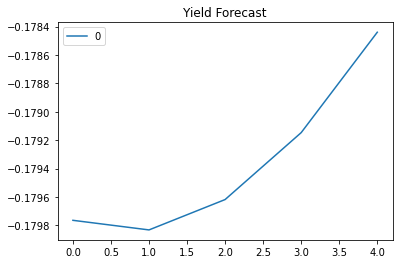

In [26]:
# Forecasting the future
# YOUR CODE HERE!
pd.DataFrame(result.forecast(steps=5)[0]).plot(title="Yield Forecast")